**objective**

In this checkpoint, we are going to work on the Titanic data set to predict if a passenger will survive or not using several classification algorithms of supervised learning. We will start by logistic regression, knn, then decision tree and we finalize by random forest.



In [ ]:
#importing main libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
#loading dataset
titanic = sns.load_dataset('titanic')

**EDA**

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic = titanic.drop('deck',axis=1)

In [ ]:
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode())

In [ ]:
encoder=LabelEncoder()
def feature_encoder(*labels):
  for label in labels:
    titanic[label] = encoder.fit_transform(titanic[label])
    print(f"{label} is encoded.")

In [ ]:
feature_encoder('sex','embarked','class','who','adult_male','embark_town','alive','alone')

sex is encoded.
embarked is encoded.
class is encoded.
who is encoded.
adult_male is encoded.
embark_town is encoded.
alive is encoded.
alone is encoded.


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


In [ ]:
X = titanic.drop(['survived','alive'],axis=1)
y = titanic['survived']

In [ ]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0
1,1,0,38.0,1,0,71.2833,0,0,2,0,0,0
2,3,0,26.0,0,0,7.9250,2,2,2,0,2,1
3,1,0,35.0,1,0,53.1000,2,0,2,0,2,0
4,3,1,35.0,0,0,8.0500,2,2,1,1,2,1


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=420) 

**Part 1 Logistic Regression**

1. Apply logistic regression. 

2. Use confusion matrix to validate your model. 

3. Another validation matrix for classification is ROC / AUC , do your research on them explain them and apply them in our case



In [ ]:
#importing libraries for LR
from sklearn.linear_model import LogisticRegression

In [ ]:
#Applying Logistic Regression Model
lr=LogisticRegression(max_iter=500)
lr.fit(X_train,y_train)
lg_y_pred = lr.predict(X_test)

In [ ]:
#LG accuracy
lg_accuracy = metrics.accuracy_score(y_test,lg_y_pred) 
lg_accuracy

0.8268156424581006

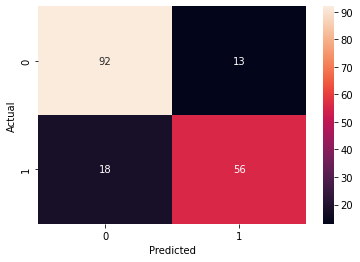

In [ ]:
#validatin the model using confusion matrix
confusion_matrix = pd.crosstab(y_test, lg_y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

ROC / AUC

In [ ]:
#ROC AUC Metrics
lg_y_pred_test_prob=lr.predict_proba(X_test)[:,1]
FPR, TPR, cutoffs = metrics.roc_curve(y_test,lg_y_pred_test_prob,pos_label=1)   
roc_auc = metrics.auc(FPR, TPR)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.891763


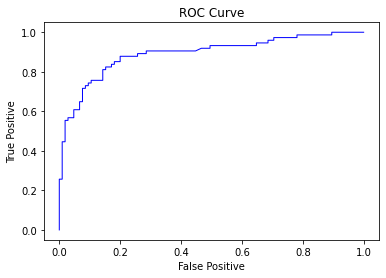

In [ ]:
plt.plot(FPR,TPR,c='blue',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [ ]:
#Optimizing the model threshold
i = np.arange(len(TPR))
roc = pd.DataFrame({'FPR' : pd.Series(FPR, index=i),'TPR' : pd.Series(TPR, index = i),\
                    '1-FPR' : pd.Series(1-FPR, index = i), 'tf' : pd.Series(TPR - (1-FPR), index = i),\
                    'cutoffs' : pd.Series(cutoffs, index = i)})
cutoff = roc.iloc[(roc.tf-0).abs().argsort()[:1]]['cutoffs'].values

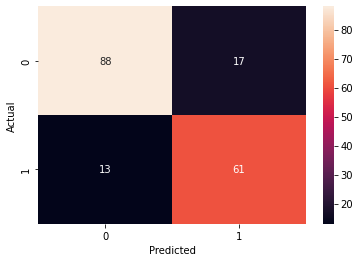

In [ ]:
#Applying the threshold aka cutoff
lg_y_pred_test_val = (lg_y_pred_test_prob > cutoff).astype(int)
conf_mat = pd.crosstab(y_test, lg_y_pred_test_val, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_mat, annot=True)

**Part 2 KNN**

1.  Apply the KNN and predict your model

2. Choose the optimal number of neighbors

In [ ]:
#importing KNN model
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Applying KNN model 
knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(X_train,y_train) #Training KNN classifier
knn_y_pred=knn.predict(X_test)  #Testing

In [ ]:
#KNN accuracy
print('Accuracy=',metrics.accuracy_score(knn_y_pred,y_test))

Accuracy= 0.7150837988826816


In [ ]:
#finding the optimal k-neighbor
n_neighbors=20
optimal_k={}
scores = []
for k in range(1,n_neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn_y_pred=knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(knn_y_pred,y_test),2))
    optimal_k[(round(metrics.accuracy_score(knn_y_pred,y_test),2))] = [k]
max(optimal_k.items()) #{'accuracy':'k_optimal'}

(0.76, [15])

Text(0, 0.5, 'Testing Accuracy')

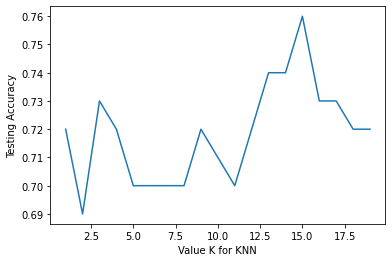

In [ ]:
#old fashion way 'ploting'
import matplotlib.pyplot as plt
plt.plot(range(1,n_neighbors),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
#KNN ROC AUC Metrics
knn_y_pred_test_prob=knn.predict_proba(X_test)[:,1]
knnFPR, knnTPR, knncutoffs = metrics.roc_curve(y_test,knn_y_pred_test_prob,pos_label=1)   
knn_roc_auc = metrics.auc(knnFPR, knnTPR)
print("Area under the ROC curve : %f" % knn_roc_auc)

Area under the ROC curve : 0.741570


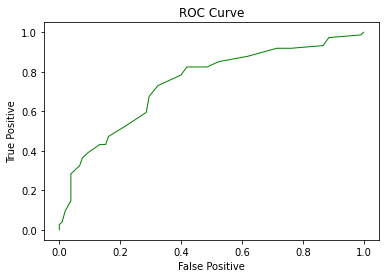

In [ ]:
#KNN ROC Curve
plt.plot(knnFPR,knnTPR,c='green',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

**Part 3:  Decision tree and random forest**

1. Apply decision tree and predict you model

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(change at least two parameters), 

4. Calculate the new accuracy and compare it with the previous results. 

5. Use random forest then change the number of estimators

6. Calculate the new accuracy and compare it with the previous result.



In [ ]:
#import tree libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Applying tree model
dt = DecisionTreeClassifier()  
dt.fit(X_train, y_train)  
tree_y_pred=dt.predict(X_test)

In [ ]:
#Tree model accuracy
print("score:{}".format(metrics.accuracy_score(y_test, tree_y_pred)))

score:0.8324022346368715


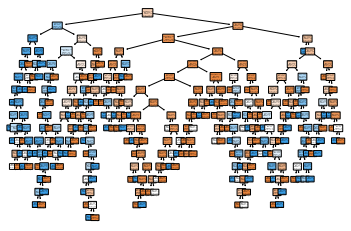

In [ ]:
from sklearn.tree import plot_tree

plot_tree(dt, feature_names = X.columns, class_names = str(titanic['survived'].unique().tolist()),filled = True, rounded = True)

plt.savefig('tree_visualization.png') 

In [ ]:
#tweaking the DT model
dt2 = DecisionTreeClassifier(criterion='entropy', splitter='random')  
dt2.fit(X_train, y_train)  
tree_y_pred2=dt2.predict(X_test)

In [ ]:
#Tree model accuracy
print("default tree score:{}".format(metrics.accuracy_score(y_test, tree_y_pred)))
print("tweaked tree score:{}".format(metrics.accuracy_score(y_test, tree_y_pred2)))

default tree score:0.8324022346368715
tweaked tree score:0.8379888268156425


In [ ]:
#DT ROC AUC Metrics
dt_y_pred_test_prob=dt.predict_proba(X_test)[:,1]
dtFPR, dtTPR, dtcutoffs = metrics.roc_curve(y_test,dt_y_pred_test_prob,pos_label=1)   
dt_roc_auc = metrics.auc(dtFPR, dtTPR)
print("Area under the ROC curve : %f" % dt_roc_auc)

Area under the ROC curve : 0.821622


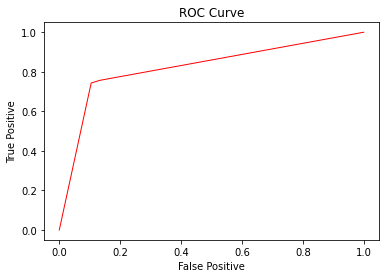

In [ ]:
plt.plot(dtFPR,dtTPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [ ]:
#random forst librarie
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#applying random forest model
rf=RandomForestClassifier(n_estimators=10)  
rf.fit(X_train, y_train)
rf_y_pred=rf.predict(X_test)

In [ ]:
#random forest accuracy
print("RF Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))

RF Accuracy: 0.8100558659217877


In [ ]:
#tweaking RF n_estimators
rf2=RandomForestClassifier(n_estimators=20)  
rf2.fit(X_train, y_train)
rf_y_pred2=rf2.predict(X_test)

In [ ]:
#random forest accuracy
print("Tweaked RF Accuracy:", metrics.accuracy_score(y_test, rf_y_pred2))

Tweaked RF Accuracy: 0.8156424581005587


In [ ]:
#RF ROC AUC Metrics
rf_y_pred_test_prob=rf.predict_proba(X_test)[:,1]
rfFPR, rfTPR, rfcutoffs = metrics.roc_curve(y_test,rf_y_pred_test_prob,pos_label=1)   
rf_roc_auc = metrics.auc(dtFPR, dtTPR)
print("Area under the ROC curve : %f" % dt_roc_auc)

Area under the ROC curve : 0.821622


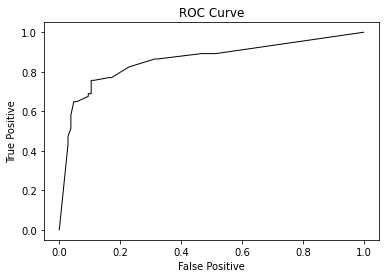

In [ ]:
plt.plot(rfFPR,rfTPR,c='black',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

Now to finalize your project, make a summary graph which resume all accuracies of each model(logistic regression, knn Decision tree and random forest) to decide which model is the most performant


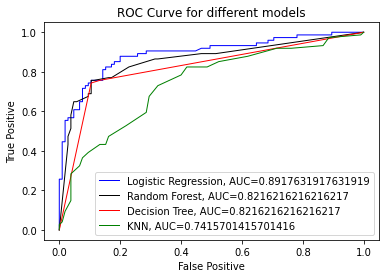

In [ ]:
#Compare between different models with ROC curve
plt.plot(FPR,TPR,c='blue',linewidth=1.0,label="Logistic Regression, AUC="+str(roc_auc))
plt.plot(rfFPR,rfTPR,c='black',linewidth=1.0,label="Random Forest, AUC="+str(rf_roc_auc))
plt.plot(dtFPR,dtTPR,c='red',linewidth=1.0,label="Decision Tree, AUC="+str(dt_roc_auc))
plt.plot(knnFPR,knnTPR,c='green',linewidth=1.0,label="KNN, AUC="+str(knn_roc_auc))
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve for different models')
plt.legend()
plt.show()
#The more that a ROC curve hugs the top left corner of the plot,
#the better the model does at classifying the data into categories.

The most performing model is the Logestic Regression